In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
salary = pd.read_csv('Salary_Data.csv')
salary

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891
5,2.9,23.0,56642
6,3.0,23.0,60150
7,3.2,23.3,54445
8,3.2,23.3,64445
9,3.7,23.6,57189


In [79]:
salary.describe()

,YearsExperience,Age,Salary
count,30.000000,30.000000,30.000000
mean,5.313333,27.216667,76003.000000
std,2.837888,5.161267,27414.429785
min,1.100000,21.000000,37731.000000
25%,3.200000,23.300000,56720.750000
50%,4.700000,25.000000,65237.000000
75%,7.700000,30.750000,100544.750000
max,10.500000,38.000000,122391.000000


In [80]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Age              30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


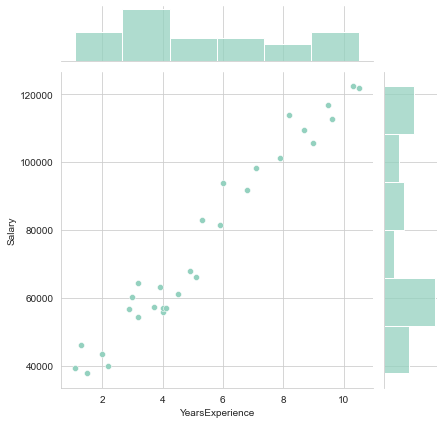

In [81]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='YearsExperience',y='Salary',data=salary)

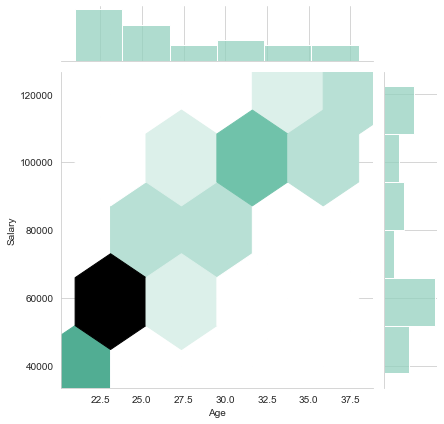

In [82]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='Age',y='Salary',kind='hex',data=salary)

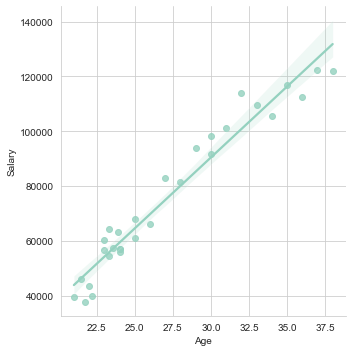

In [83]:
sns.lmplot(x='Age',y='Salary',data=salary)

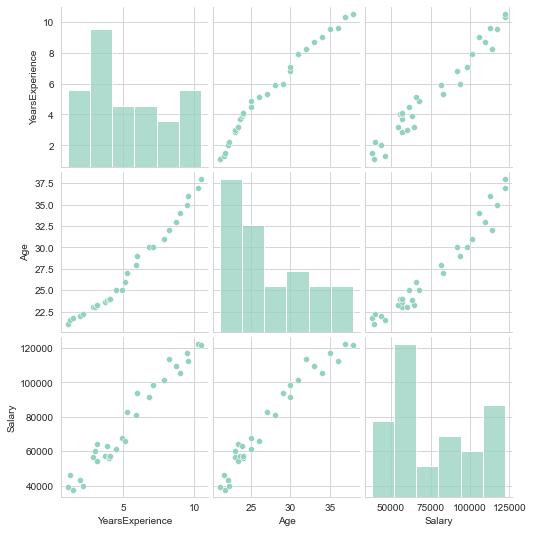

In [84]:
sns.pairplot(salary)

In [85]:
X = salary[['YearsExperience','Age']]
y = salary['Salary']

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [87]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [88]:
lm.fit(X_train,y_train)

LinearRegression()

In [89]:
lm.coef_

array([5193.91419529, 2210.56071721])

In [90]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

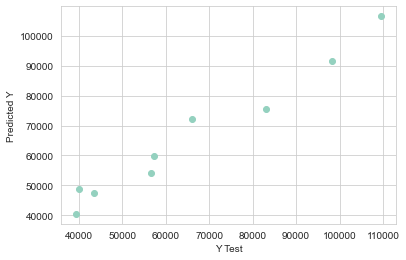

In [91]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [92]:
from sklearn import metrics

In [93]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE :   4707.098136502782
MSE :   28736414.22006011
RMAE :   5360.6356171689295


C:\Users\YESH\Python\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

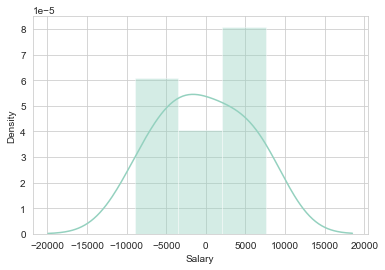

In [94]:
sns.distplot(y_test - predictions)

In [97]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
YearsExperience,5193.914195
Age,2210.560717
